<a href="https://colab.research.google.com/github/springboardmentor447/AI_STYLIST_Infosys_Internship_Oct2024/blob/Mohammed-ghouse/AI_stylist_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_json('/content/drive/MyDrive/fashion_products_data.ldjson', lines = True)
print("dataset loaded")

Mounted at /content/drive
dataset loaded


In [ ]:
print(df.shape)

(30000, 33)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id                        30000 non-null  object 
 1   crawl_timestamp                30000 non-null  object 
 2   asin                           30000 non-null  object 
 3   product_url                    30000 non-null  object 
 4   product_name                   30000 non-null  object 
 5   image_urls__small              29998 non-null  object 
 6   medium                         29998 non-null  object 
 7   large                          28841 non-null  object 
 8   browsenode                     29480 non-null  float64
 9   brand                          21857 non-null  object 
 10  sales_price                    27110 non-null  float64
 11  weight                         30000 non-null  object 
 12  rating                         30000 non-null 

In [ ]:
print(df.describe())

         browsenode   sales_price        rating  no__of_reviews  \
count  2.948000e+04  27110.000000  30000.000000     3452.000000   
mean   2.898248e+09    862.172397      4.039857      136.642236   
std    3.050401e+09    964.223008      0.840009      525.484988   
min    1.953148e+09     39.000000      1.000000        1.000000   
25%    1.968067e+09    379.000000      3.500000        4.000000   
50%    1.968135e+09    590.000000      4.000000       15.000000   
75%    1.968444e+09    899.000000      4.900000       72.000000   
max    1.751625e+10   9988.000000      5.000000     9896.000000   

       left_in_stock  no__of_offers  no__of_sellers  
count    3057.000000    1020.000000     1020.000000  
mean        2.091920       6.230392        6.230392  
std         1.317071      16.919507       16.919507  
min         1.000000       1.000000        1.000000  
25%         1.000000       1.000000        1.000000  
50%         2.000000       2.500000        2.500000  
75%         3.0000

In [ ]:
print(df.head())

                            uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2  LOVISTA Cotton Gota Pat

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
# Drop irrelevant columns like 'seller_id'and 'weight'
df_cleaned = df.drop(columns=['seller_id', 'weight'])
# Drop columns with more than 80% missing values (like technical details)
df_cleaned = df_cleaned.dropna(thresh=int(0.15 * len(df_cleaned)), axis=1)
# After dropping columns with too many missing values, drop rows with any remaining nulls
df_cleaned = df_cleaned.dropna ()
# Display cleaned dataset shape
print(f"Cleaned Dataset Shape: {df_cleaned.shape}")
print(f"Columns after cleaning: {df_cleaned.columns.tolist()}")

Cleaned Dataset Shape: (1130, 24)
Columns after cleaning: ['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name', 'image_urls__small', 'medium', 'large', 'browsenode', 'brand', 'sales_price', 'rating', 'sales_rank_in_parent_category', 'sales_rank_in_child_category', 'delivery_type', 'meta_keywords', 'amazon_prime__y_or_n', 'parent___child_category__all', 'best_seller_tag__y_or_n', 'other_items_customers_buy', 'product_details__k_v_pairs', 'discount_percentage', 'colour', 'seller_name']


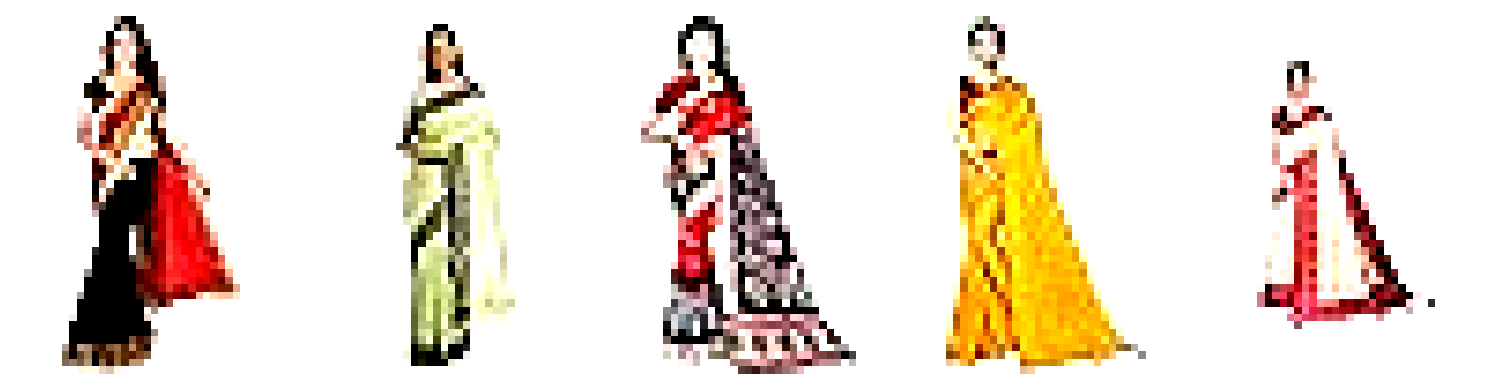

In [ ]:
import requests
from PIL import Image, ImageEnhance
from io import BytesIO
import matplotlib.pyplot as plt

# Function to load, enhance, and display product images using URLs
def display_images(image_urls, num_images=5):
    try:
        random_urls = image_urls.sample(n=num_images).reset_index(drop=True)
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

        for i in range(num_images):
            # Get the random image URL
            image_url = random_urls.iloc[i]
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content)).convert("RGB")

            # Enhance brightness and contrast
            enhancer_brightness = ImageEnhance.Brightness(img)
            img = enhancer_brightness.enhance(1.2)  # Increase brightness (1.0 is original, >1.0 is brighter)

            enhancer_contrast = ImageEnhance.Contrast(img)
            img = enhancer_contrast.enhance(1.5)  # Increase contrast (1.0 is original, >1.0 is higher contrast)

            # Display each image in a subplot
            axes[i].imshow(img)
            axes[i].axis('off')  # Hide axes for each image

        plt.tight_layout()
        plt.show()  # Display all the images
    except Exception as e:
        print(f"Error displaying images: {e}")

# Display the enhanced images
display_images(df_cleaned['image_urls__small'], num_images=5)


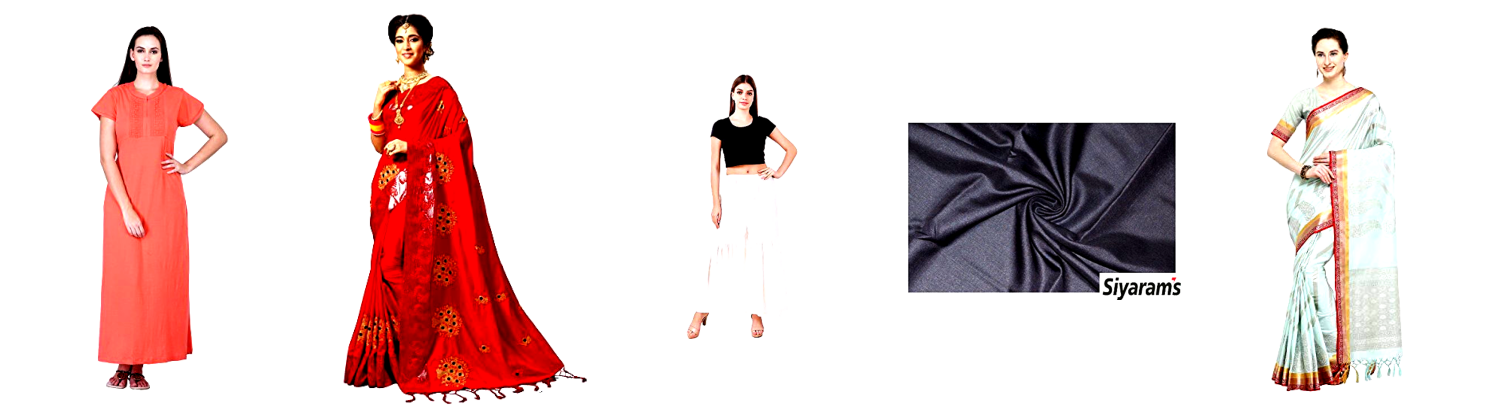

In [ ]:
display_images(df_cleaned['medium'], num_images=5)

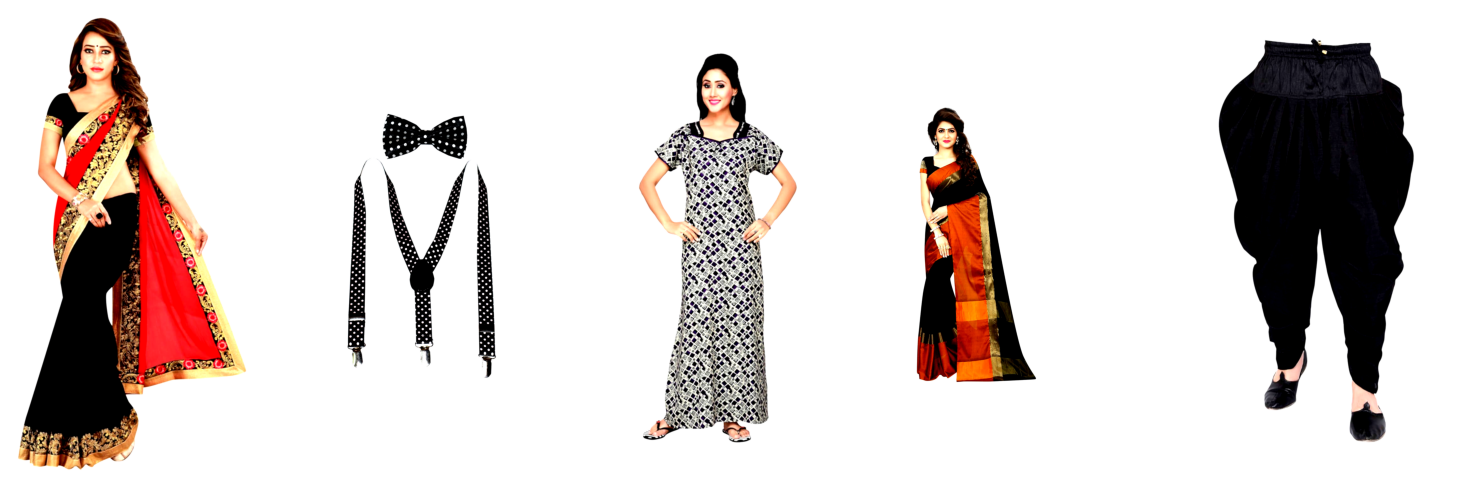

In [ ]:
display_images(df_cleaned['large'], num_images=5)

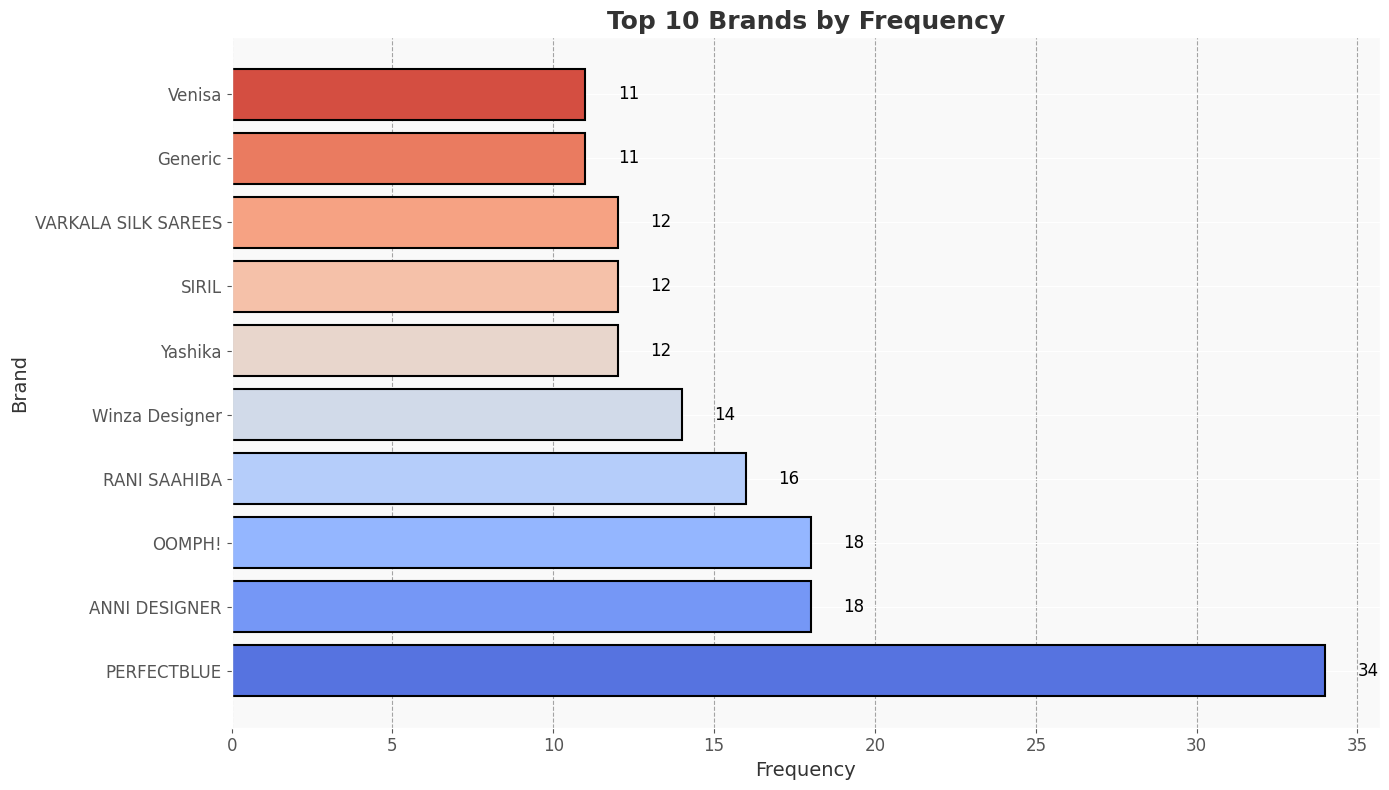

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid built-in style
plt.style.use('ggplot')

# Set figure size for better clarity
fig, ax = plt.subplots(figsize=(14, 8))

# Get top 10 brands by frequency
top_brands = df_cleaned['brand'].value_counts().nlargest(10)

# Custom color palette
custom_palette = sns.color_palette("coolwarm", n_colors=10)

# Create a horizontal bar plot
bars = ax.barh(top_brands.index, top_brands.values, color=custom_palette, edgecolor='black', linewidth=1.5)

# Add a title and labels with custom styling
ax.set_title('Top 10 Brands by Frequency', fontsize=18, fontweight='bold', color='#333333')
ax.set_xlabel('Frequency', fontsize=14, color='#333333')
ax.set_ylabel('Brand', fontsize=14, color='#333333')

# Rotate x-ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
ax.grid(axis='x', linestyle='--', color='gray', alpha=0.7)

# Annotate each bar with its value
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{int(width)}',
                xy=(width + 1, bar.get_y() + bar.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black')

# Set the background color
ax.set_facecolor('#f9f9f9')

# Adjust layout to ensure everything fits well
plt.tight_layout()
plt.show()


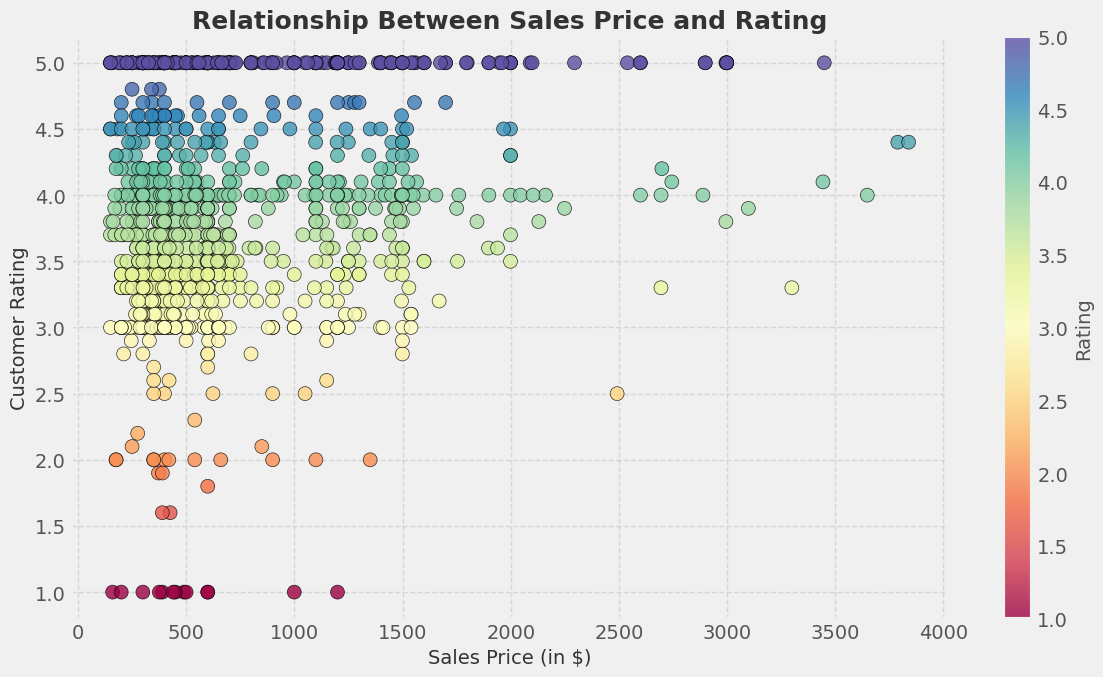

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a different style for a unique look
plt.style.use('fivethirtyeight')

# Set up the figure size
fig, ax = plt.subplots(figsize=(12, 7))

# Create a custom color palette based on rating
colors = sns.color_palette('Spectral', as_cmap=True)

# Enhanced scatter plot with hue based on the 'rating' column and a color gradient
scatter = ax.scatter(
    x=df_cleaned['sales_price'],
    y=df_cleaned['rating'],
    c=df_cleaned['rating'],
    cmap=colors,
    s=100,  # Increased marker size for better visibility
    alpha=0.8,  # Transparency for overlapping points
    edgecolor='black'  # Edge color for markers
)

# Add a color bar for better interpretation of the rating scale
cbar = plt.colorbar(scatter)
cbar.set_label('Rating', fontsize=14)

# Add a title and labels with custom styling
ax.set_title('Relationship Between Sales Price and Rating', fontsize=18, fontweight='bold', color='#333333')
ax.set_xlabel('Sales Price (in $)', fontsize=14, color='#333333')
ax.set_ylabel('Customer Rating', fontsize=14, color='#333333')

# Add grid lines for better readability
ax.grid(linestyle='--', alpha=0.7)

# Set background color
ax.set_facecolor('#f0f0f0')

# Display the plot with tight layout
plt.tight_layout()
plt.show()



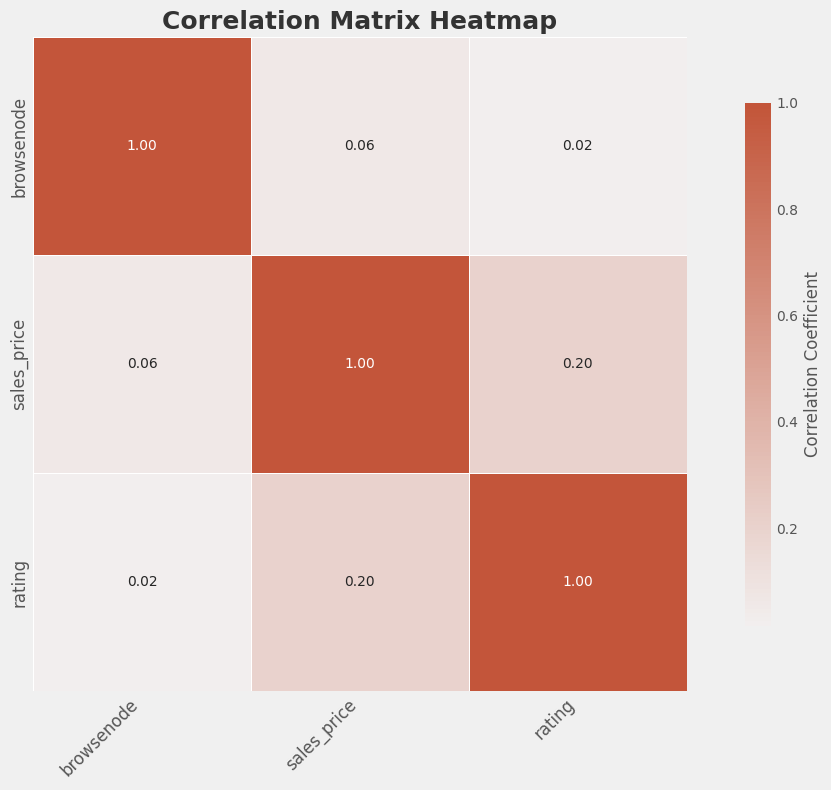

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the DataFrame to include only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the figure size and style
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')

# Create a diverging colormap for better visual distinction
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,  # Display correlation values on the heatmap
    fmt=".2f",  # Format the numbers to 2 decimal places
    cmap=cmap,
    center=0,  # Center the colormap at 0 for diverging colors
    linewidths=0.5,  # Add space between cells
    linecolor='white',  # Line color for separation
    square=True,  # Make cells square-shaped
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}  # Customize color bar
)

# Customize the title and labels
plt.title('Correlation Matrix Heatmap', fontsize=18, fontweight='bold', color='#333333')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Tight layout for better fitting
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
print(df_cleaned['product_name'])

20       PuJoy Women's Soft Cotton Traditional Bengali ...
57                  Aai Shree Khodiyar Art Georgette Saree
61       Lincy fashion women's anarkli gown (Semi-Stitc...
75       SCH Regular Fit Women's Cotton Rayon Casual Pa...
91                                 Loviena Gypsy Men's Tie
                               ...                        
29863    Blacksmith Red Tie for Men - Black Tie for Men...
29900    Karva Fashion Women Georgette Long Anarkali Sa...
29925    Lehenga Style Women's Unstitched Salwar Suit D...
29928                              Treaso Cubical Tie Belt
29942    Varkala Silk Sarees Women's Soft katan Silk Wo...
Name: product_name, Length: 1130, dtype: object
